In [5]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

Вариант 7 Глазунов Даниил ПИ19-4

In [6]:
def Task(X, x, y, y2):
    # Вывод матрицы прямых затрат A
    A = X / x
    # Единичная матрица 2х2
    E = np.eye(2)
    # Построение матрицы (E-A) и ее вывод
    EA = E - A
    # Построение матрицы полных затрат S=(E-A)−1
    S = linalg.inv(EA)
    # Проверка обратной матрицы
    E1 = S @ EA
    # Проверка: для всех ли элементов матрицы S выполнено условие
    prod = (S>0).all()
    # Вычисление собственных значений и собственных векторов матрицы A
    val, vect = np.linalg.eig(A)
    # Собственные значения матрицы A
    d = np.linalg.eigvals(A)
    fr = np.argmax(val)
    #Вектор Фробениуса pA
    vec = abs(vect[:,fr])
    # Определение числа Фробениуса
    ch_fob = max(d)
    # Вектор объемов производства по отраслям (x1=x)
    x1 = S @ y
    # Вектор новых объемов производства по отраслям (валового выпуска)
    x2 = S @ y2
    # Чистая продукция отрасли - разность между валовой продукцией этой
    #отрасли и продукцией всех отраслей на производство этой отрасли
    xc = np.array([0, 0])
    x11 = A[0,0] * x2[0]
    x21 = A[1,0] * x2[0]
    xc[0] = x2[0]-(x11+x21)
    x12 = A[0,1]*x2[1]
    x22 = A[1,1]*x2[1]
    xc[1] = x2[1]-(x12 + x22)
 
    return f'''Матрица прямых затрат A = {A}, 
    Матрица A{' НЕ' if not prod else ''} продуктивна,
    Число Фробениуса λA = {ch_fob},
    Вектор Фробениуса pA = {vec},
    Новый вектор объемов производства (валового выпуска) x2 = {x2},
    Вектор-столбец выпуска чистой продукции xc = {xc}
'''

In [7]:
print(Task(np.array([[7, 26], [18, 24]]), np.sum(np.array([[7, 26], [18, 24]]), axis=1) + np.array([95, 131]), np.array([95, 131]),  np.array([190, 95])))

Матрица прямых затрат A = [[0.0546875  0.15028902]
 [0.140625   0.13872832]], 
    Матрица A продуктивна,
    Число Фробениуса λA = 0.24803572844534927,
    Вектор Фробениуса pA = [0.61370412 0.7895361 ],
    Новый вектор объемов производства (валового выпуска) x2 = [224.3516884 146.9332612],
    Вектор-столбец выпуска чистой продукции xc = [180 104]



([<matplotlib.axis.XTick at 0x21efaa4e190>,
 [Text(0.3, 0, '1'), Text(1.3, 0, '2')])

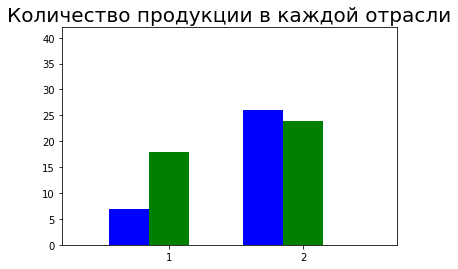

In [8]:
index = np.arange(2)
values1 = [7, 26]
values2 = [18, 24]
bw = 0.3
plt.axis([-0.5,2,0,42])
plt.title('Количество продукции в каждой отрасли', fontsize=20)
plt.bar(index, values1, bw, color='b')
plt.bar(index+bw, values2, bw, color='g')
plt.xticks(index+bw,['1','2'])

([<matplotlib.axis.YTick at 0x21ef99eaa90>,
 [Text(0, 0.3, '1'), Text(0, 1.3, '2')])

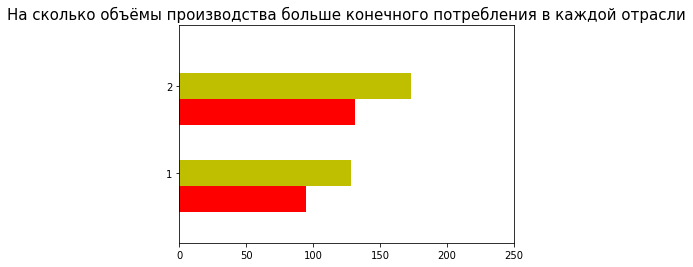

In [9]:
import matplotlib.pyplot as plt

index = np.arange(2)
# Вектор-столбец конечного потребления
y = np.array([95, 131])
# Вектор-столбец объемов производства
x =  np.sum(np.array([[7, 26], [18, 24]]), axis=1) + np.array([95, 131])
bw = 0.3
plt.axis([0,250,-0.5,2])
plt.title('На сколько объёмы производства больше конечного потребления в каждой отрасли', fontsize=15)
plt.barh(index, y, bw, color='r')
plt.barh(index+bw, x, bw, color='y')
plt.yticks(index+bw,['1','2'])